# **Brain Tumor Classification**



## **Context**

Brain tumor is known to be one of the most aggressive diseases that affect both children and adults. Of all primary Central Nervous System (CNS) tumors, brain tumors account for 85 to 90 percent. **Around 11,700 individuals are diagnosed with a brain tumor every year.** For individuals with a cancerous brain or CNS tumor, **the 5-year survival rate is around 34 percent for men and 36 percent for women.** Brain tumors are classified into Benign Tumors, Pituitary Tumors, Malignant Tumors etc. In order to increase the life expectancy of patients, adequate care, preparation and reliable diagnostics are required in the treatment process.

**Magnetic Resonance Imaging (MRI)** is the best way to identify brain tumors. A huge amount of image data is produced through MRI Scans. However, there are several anomalies in the tumor size and location (s). This makes it very difficult to completely comprehend the nature of the tumor. **A trained neurosurgeon is usually needed for MRI image analysis.** **The lack of qualified doctors and the lack of knowledge about tumors makes it very difficult and time-consuming for clinical facilities in developing countries to perform MRI studies.** Due to the level of difficulty involved in comprehending the nature of brain tumors and their properties, manual analyses can be highly error-prone. That makes an automated MRI analysis system crucial to solve this problem. 

**Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) algorithms have consistently shown better performance than manual classification.** It would therefore be highly beneficial to write an algorithm that performs **detection and classification of brain tumors using Deep Learning Algorithms.**

## **Dataset**

The dataset folder contains MRI data. The images are already split into Training and Testing folders.
Each folder has more four subfolders named **`"glioma_tumor", "meningioma_tumor", "no_tumor"`** and **`"pituitary_tumor"`**. These folders have MRI images of the respective tumor classes.

**Instructions** to access the data through Google Colab:

Follow the below steps: 

1) Download the zip file from Olympus and extract it in your local system. 

2) Upload the extracted folder into your drive.

3) Mount your Google Drive using the code below.


```
from google.colab import drive
drive.mount('/content/drive')
```


4) Now, you can read the dataset as mentioned in the code below.

## **Problem Statement**

To build a classification model that can take images of MRI scans as input and can classify them into one of the following types of tumor:

**`glioma_tumor`**, **`meningioma_tumor`**, **`pituitary_tumor`** and **`no_tumor`**.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Computer_vision_online_template/MLS-2-Brain tumor classification/Data Set Brain Tumor-20210716T095432Z-001 (1).zip"

Archive:  /content/drive/MyDrive/Computer_vision_online_template/MLS-2-Brain tumor classification/Data Set Brain Tumor-20210716T095432Z-001 (1).zip
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (779).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (691).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (722).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (808).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (627).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (630).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (73).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (74).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (748).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (63).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary_tumor/p (795).jpg  
  inflating: Data Set Brain Tumor/Training/pituitary

### **Importing the libraries**

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


### **Reading the Training Data**

In [ ]:
DATADIR = "/content/Data Set Brain Tumor/Training/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
IMG_SIZE=150
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


### **Reading the Testing Dataset**


In [ ]:

DATADIR = "/content/Data Set Brain Tumor/Testing/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
IMG_SIZE=150
#Storing all the training images
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()


### **Data Preprocessing** 

In [ ]:
# Separating the images and labels
X_train = []
y_train = []
np.random.shuffle(training_data)
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train= np.array(X_train)
print(X_train.shape)

# Normalizing pixel values  
X_train = X_train/255.0  
# image reshaping 
X_train = X_train.reshape(-1,150,150,1)

(2881, 150, 150)


In [ ]:
X_test = []
y_test = []

np.random.shuffle(testing_data)
IMG_SIZE = 150
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

(402, 150, 150)


### **Exploratory Data Analysis**

In [ ]:
#creating the dataframe to plot the pie chart
df=pd.DataFrame(y_train,columns=['Suffering'])

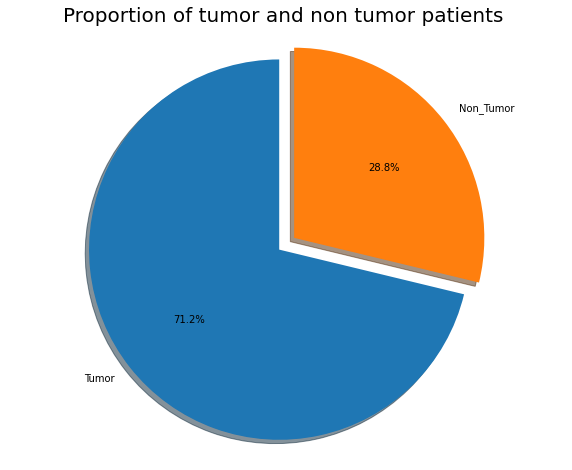

In [ ]:
#plotting the pie chart 
labels = 'Tumor', 'Non_Tumor'
sizes = [df.Suffering[df['Suffering']!=0].count(), df.Suffering[df['Suffering']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of tumor and non tumor patients ", size = 20)
plt.show()

The above plot shows that **71.2% of the images are those of tumors** - Majority class: glioma, meningioma and pituitary tumors, while approx. **28.8% of the images** belong to the **non-tumor category** (Minority class).

**Let's visualize MRI images randomly from each of the three classes.** The Image matrix is plotted and each row represents three single channel images corresponding to one class. We have read single channel images in order to reduce complexity. 




In [ ]:
#train_dir = 'DATA/train' # image folder
import os
# get the list of jpegs from sub image class folders
glioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
meningioma_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}') ]
no_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
pituitary_tumor_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}') ]

# randomly select 3 of each
select_gal = np.random.choice(glioma_tumor_imgs, 3, replace = False)
select_menin = np.random.choice(meningioma_tumor_imgs, 3, replace = False)
select_no_t = np.random.choice(no_tumor_imgs, 3, replace = False)
select_pit = np.random.choice(pituitary_tumor_imgs, 3, replace = False)


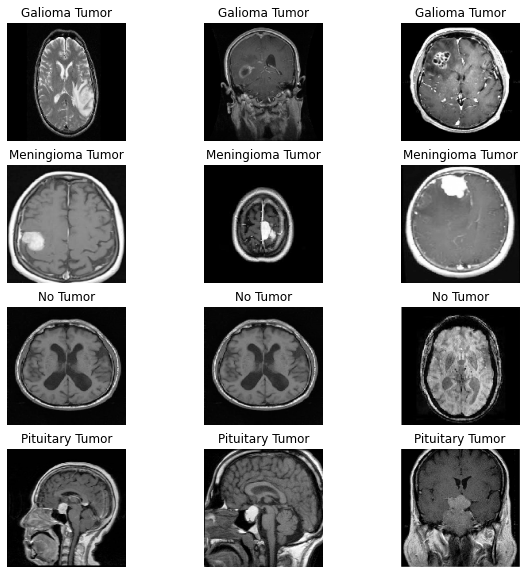

In [ ]:
from tensorflow.keras.preprocessing import image
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (10,10))
for i in range(12):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_gal[i]}'
        label = 'Galioma Tumor'
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_menin[i-3]}'
        label = 'Meningioma Tumor' 
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_no_t[i-6]}'
        label = 'No Tumor'
    if i>=9 and i<12:
        fp = f'{DATADIR}/{CATEGORIES[3]}/{select_pit[i-9]}'
        label = 'Pituitary Tumor'
    ax = fig.add_subplot(4, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here

**Finding the mean images** for each class of tumor: 

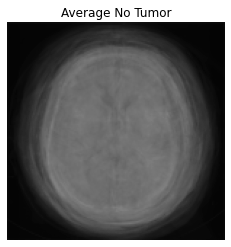

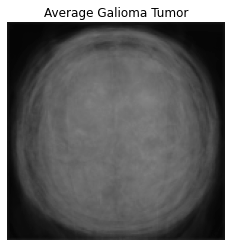

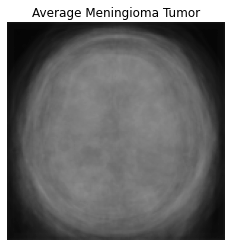

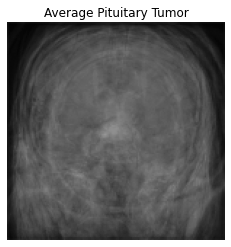

In [ ]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((150,150))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

galioma_data=[]
menin_data=[]
               
no_tumor_data=[]
               
pitu_data=[]

for cat in CATEGORIES:
        path = os.path.join(DATADIR,cat)
        for img in os.listdir(path):
                
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# Converting image to greyscale to reduce the complexity and computation 
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                if cat==CATEGORIES[0]:
                      galioma_data.append([new_array])
                if cat==CATEGORIES[1]:
                      menin_data.append([new_array])
                if cat==CATEGORIES[2]:
                      no_tumor_data.append([new_array])
                if cat==CATEGORIES[3]:
                      pitu_data.append([new_array])

                

norm_mean = find_mean_img(np.array(no_tumor_data), 'No Tumor')
gali_mean = find_mean_img(np.array(galioma_data), 'Galioma Tumor')
menin_mean = find_mean_img(np.array(menin_data), 'Meningioma Tumor')
Pitu_mean = find_mean_img(np.array(pitu_data), 'Pituitary Tumor')


### **Contrast Difference**

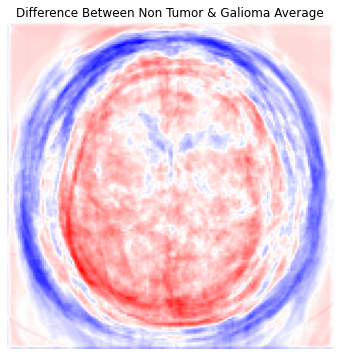

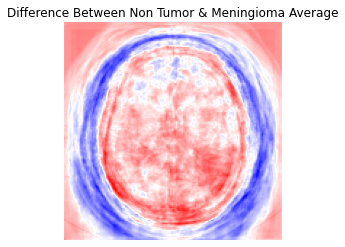

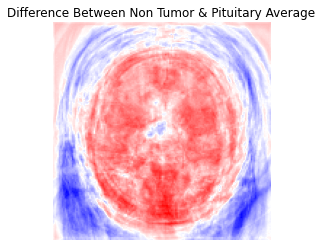

In [ ]:
fig = plt.figure(figsize = (8,6))

for i in enumerate([gali_mean,menin_mean,Pitu_mean]):
      
      contrast_mean = norm_mean - i[1]
      plt.imshow(contrast_mean, cmap='bwr')
      if i[0]==0:
          plt.title(f'Difference Between Non Tumor & Galioma Average')
      if i[0]==1:
          plt.title(f'Difference Between Non Tumor & Meningioma Average')
      if i[0]==2:
          plt.title(f'Difference Between Non Tumor & Pituitary Average')
      plt.axis('off')
      plt.show()

As we can see from the contrast difference between the No tumor image and the tumor image, the blue area represents the negative values, meaning the size of the tumorous brain is more than  non-tumourous brain.

### **One-Hot Encoding**

In [ ]:
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [ ]:
print(y_train_e.shape)
print(y_test_e.shape)

(2881, 4)
(402, 4)


### **Model Building** 

We will be using two types of Deep Neural Networks:

- **ANN** (Artificial Neural Network - fully connected)
- **CNN** (Convolutional Neural Network)

#### **ANN**

In [ ]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(150,150)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 500)               11250500  
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 4)                 2804      
                                                                 
Total params: 11,604,004
Trainable params: 11,604,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
34/36 [===========================>..] - ETA: 0s - loss: 1.7564 - accuracy: 0.4591
Epoch 00001: val_accuracy improved from -inf to 0.53033, saving model to best_model.h5
36/36 [==============================] - 3s 30ms/step - loss: 1.7321 - accuracy: 0.4631 - val_loss: 1.1037 - val_accuracy: 0.5303
Epoch 2/200
34/36 [===========================>..] - ETA: 0s - loss: 0.9150 - accuracy: 0.6135
Epoch 00002: val_accuracy improved from 0.53033 to 0.63085, saving model to best_model.h5
36/36 [==============================] - 1s 23ms/step - loss: 0.9170 - accuracy: 0.6085 - val_loss: 0.8470 - val_accuracy: 0.6308
Epoch 3/200
35/36 [============================>.] - ETA: 0s - loss: 0.7085 - accuracy: 0.7089
Epoch 00003: val_accuracy improved from 0.63085 to 0.67591, saving model to best_model.h5
36/36 [==============================] - 1s 23ms/step - loss: 0.7081 - accuracy: 0.7092 - val_loss: 0.7348 - val_accuracy: 0.6759
Epoch 4/200
34/36 [===========================>..] - ETA: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


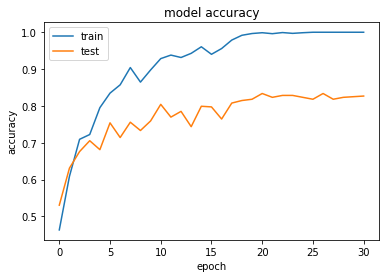

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import numpy
model_ann.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 6ms/step - loss: 5.7158 - accuracy: 0.6915


[5.715756416320801, 0.6915422677993774]

As we see here, the **ANN does not show a good test accuracy**, since ANNs are unable to capture spatial correlation characteristics of the image. 

**Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.** 
CNNs tend to behave well on image data but the important point to consider is, it may not be true until an optimized CNN is built depending on the data.

#### **Convolutional Neural Network (CNN)**

**Model 1:** CNN with Dropout

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
36/36 [==============================] - ETA: 0s - loss: 1.3154 - accuracy: 0.3672
Epoch 00001: val_accuracy improved from -inf to 0.49220, saving model to best_model.h5
36/36 [==============================] - 19s 250ms/step - loss: 1.3154 - accuracy: 0.3672 - val_loss: 1.1102 - val_accuracy: 0.4922
Epoch 2/30
36/36 [==============================] - ETA: 0s - loss: 1.0090 - accuracy: 0.5838
Epoch 00002: val_accuracy improved from 0.49220 to 0.63605, saving model to best_model.h5
36/36 [==============================] - 8s 221ms/step - loss: 1.0090 - accuracy: 0.5838 - val_loss: 0.9042 - val_accuracy: 0.6360
Epoch 3/30
36/36 [==============================] - ETA: 0s - loss: 0.8622 - accuracy: 0.6267
Epoch 00003: val_accuracy did not improve from 0.63605
36/36 [==============================] - 8s 216ms/step - loss: 0.8622 - accuracy: 0.6267 - val_loss: 0.9148 - val_accuracy: 0.5945
Epoch 4/30
36/36 [==============================] - ETA: 0s - loss: 0.7413 - accuracy: 0.692

In [ ]:
model.evaluate(X_test,np.array(y_test_e))

13/13 [==============================] - 2s 80ms/step - loss: 2.8122 - accuracy: 0.7139


[2.812236785888672, 0.7139303684234619]

Here we can observe that this is performing better than ANN but we will try to optimize this model and improve its performance.

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively 

Since CNN Model 1 does not appear to have good test accuracy and appears to be overfitting on the training dataset, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [ ]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [ ]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 4, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 8)       208       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 8)       0         
                                                                 
 dropout_6 (Dropout)         (None, 150, 150, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 16)        3216      
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
11/11 [==============================] - ETA: 0s - loss: 1.3745 - accuracy: 0.3318
Epoch 00001: val_accuracy improved from -inf to 0.38754, saving model to best_model.h5
11/11 [==============================] - 4s 196ms/step - loss: 1.3745 - accuracy: 0.3318 - val_loss: 1.3172 - val_accuracy: 0.3875
Epoch 2/60
10/11 [==========================>...] - ETA: 0s - loss: 1.2917 - accuracy: 0.3926
Epoch 00002: val_accuracy improved from 0.38754 to 0.47405, saving model to best_model.h5
11/11 [==============================] - 2s 156ms/step - loss: 1.2935 - accuracy: 0.3920 - val_loss: 1.2351 - val_accuracy: 0.4740
Epoch 3/60
10/11 [==========================>...] - ETA: 0s - loss: 1.2807 - accuracy: 0.4207
Epoch 00003: val_accuracy improved from 0.47405 to 0.50865, saving model to best_model.h5
11/11 [==============================] - 2s 147ms/step - loss: 1.2807 - accuracy: 0.4209 - val_loss: 1.2225 - val_accuracy: 0.5087
Epoch 4/60
10/11 [==========================>...] - ETA: 0

In [ ]:
model.evaluate(X_test,np.array(y_test_e))

13/13 [==============================] - 1s 40ms/step - loss: 2.8122 - accuracy: 0.7139


[2.812236785888672, 0.7139303684234619]

This model unfortunately **does not have a good test accuracy as compared to train and validation accuracy** 

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [ ]:
lr = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 4, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 8)       208       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 8)       0         
                                                                 
 dropout_10 (Dropout)        (None, 150, 150, 8)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 16)        3216      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train_e, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
5/6 [========================>.....] - ETA: 0s - loss: 2.3665 - accuracy: 0.2781
Epoch 00001: val_accuracy improved from -inf to 0.47059, saving model to best_model.h5
6/6 [==============================] - 5s 455ms/step - loss: 2.3546 - accuracy: 0.2782 - val_loss: 1.2953 - val_accuracy: 0.4706
Epoch 2/40
5/6 [========================>.....] - ETA: 0s - loss: 1.2459 - accuracy: 0.4773
Epoch 00002: val_accuracy did not improve from 0.47059
6/6 [==============================] - 2s 264ms/step - loss: 1.2455 - accuracy: 0.4776 - val_loss: 1.2681 - val_accuracy: 0.3460
Epoch 3/40
5/6 [========================>.....] - ETA: 0s - loss: 1.1636 - accuracy: 0.4789
Epoch 00003: val_accuracy improved from 0.47059 to 0.55709, saving model to best_model.h5
6/6 [==============================] - 2s 327ms/step - loss: 1.1629 - accuracy: 0.4799 - val_loss: 1.0415 - val_accuracy: 0.5571
Epoch 4/40
5/6 [========================>.....] - ETA: 0s - loss: 1.0250 - accuracy: 0.5520
Epoch 00004: 

In [ ]:
model.evaluate(X_test,np.array(y_test_e))

13/13 [==============================] - 0s 37ms/step - loss: 2.8122 - accuracy: 0.7139


[2.812236785888672, 0.7139303684234619]

### **Plotting the Train & Validation Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


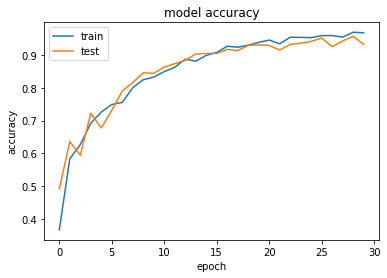

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


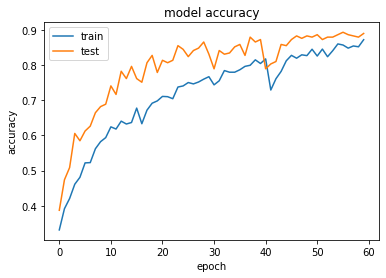

In [ ]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


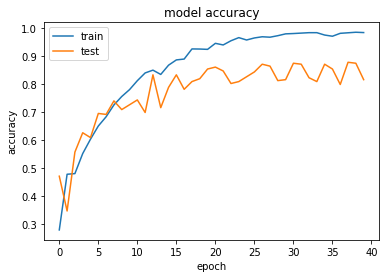

In [ ]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Model Evaluation**

**CNN Model 1**

In [ ]:
model.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 35ms/step - loss: 2.8122 - accuracy: 0.7139


[2.812236785888672, 0.7139303684234619]

**CNN Model 2**

In [ ]:
model_ln3.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 16ms/step - loss: 1.7118 - accuracy: 0.6766


[1.7117514610290527, 0.676616907119751]

**CNN Model 3**

In [ ]:
model_ln4.evaluate(X_test,y_test_e)

13/13 [==============================] - 0s 12ms/step - loss: 2.1406 - accuracy: 0.7463


[2.140639066696167, 0.746268630027771]

Unfortunately, **we cannot decide the best model based on only test accuracy here**  so we are more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, we will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 2 and Model 3 seem to be generalizing well** because they both have a good Holdout set Accuracy. **Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 2**

In [ ]:
# Test Prediction 
y_test_pred_ln3 = model_ln3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)


In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln3)



0.6766169154228856

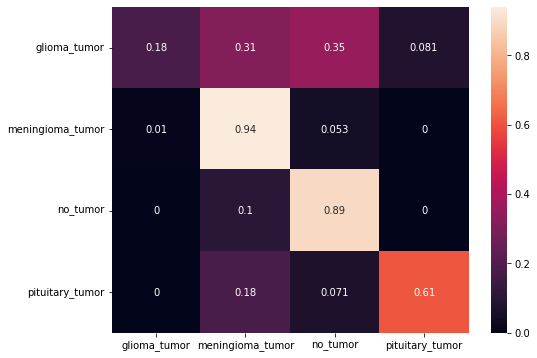

In [ ]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**CNN Model 3**

In [ ]:
#Test Prediction 

y_test_pred_ln4 = model_ln4.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_ln4)



0.746268656716418

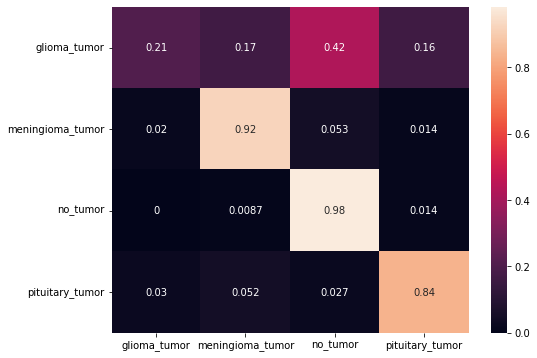

In [ ]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- **Glioma Tumor**
- **Meningioma Tumor**
- **Non Tumor**
- **Pituitary Tumor**



**CNN Model 2**

In [ ]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln3, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.94736842 0.61016949 0.6516129  0.88235294]
 Recall is [0.18       0.93913043 0.89380531 0.60810811] 
 f_beta Score is [0.30252101 0.73972603 0.75373134 0.72      ]


**CNN Model 3**

In [ ]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.80769231 0.8030303  0.66071429 0.81578947]
 Recall is [0.21       0.92173913 0.98230088 0.83783784] 
 f_beta Score is [0.33333333 0.8582996  0.79003559 0.82666667]


**Model 3 (Best) Observation**

As we see from the precision for each class, the Pituitary tumor classifier has the highest precision. But here, **we are more concerned about the case where a person who has a tumor is wrongly classified as belonging to the non-tumor category (False Negative).** 

**33% of the persons belonging to Glioma tumour and 8.6% belonging to Meningioma tumor are not identified correctly, and the model predicts that they don't have a tumor at all** - which shows that our model does not do well in identifying glioma and meningioma tumors. But it is works well for the other scenario, where the model is able to correctly identify those scans that do not not show a tumor. 

---



### **Weighted F-Score**

**Model 2**

In [ ]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln3, average='weighted')

0.6312742183633478

**Model 3**

In [ ]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test), y_test_pred_classes_ln4, average='weighted')

0.7026993568663567

Model 3 with 2 Dense layer and more  number of units having better F1 score.

### **Prediction**

Let us predict with best model with is model_ln4

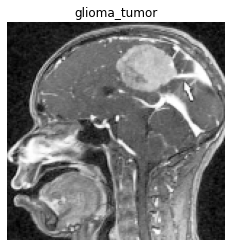

In [ ]:
#fn = image.load_img(fp, target_size = (150,150), color_mode='grayscale')
plt.imshow(X_test[1].reshape(150,150), cmap='Greys_r')
i=y_test[1]
i=np.argmax(i)
if(i == 0):
    plt.title("glioma_tumor")
if(i==1):
    plt.title("meningioma_tumor")
if(i==2):
    plt.title("no_tumor")
if(i==3):
    plt.title("pituitary_tumor")

plt.axis('off')
plt.show()

In [ ]:
res=model_ln4.predict(X_test[1].reshape(1,150,150,1))

In [ ]:
i=np.argmax(res)


if(i == 0):
    print("glioma_tumor")
if(i==1):
    print("meningioma_tumor")
if(i==2):
    print("no_tumor")
if(i==3):
    print("pituitary_tumor")


meningioma_tumor


### **Conclusion**

As we have seen, **ANNs do not work well with image data**, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better brain tumor classifier. 

We can visualize the filters  and understand why the model does not do well in the identification of the glioma tumor.
